In [2]:
import pandas as pd
from google.colab import files
import io
uploaded = files.upload()
data_file = pd.read_csv(io.BytesIO(uploaded["weo_april_2021_data.csv"]))
data_file.head()

Saving weo_april_2021_data.csv to weo_april_2021_data.csv


,Country,NGDP_R,NGDP_RPCH,NGDP,NGDPD,PPPGDP,NGDP_D,NGDPRPC,NGDPRPPPPC,NGDPPC,...,GGSB_NPGDP,GGXONLB,GGXONLB_NGDP,GGXWDN,GGXWDN_NGDP,GGXWDG,GGXWDG_NGDP,NGDP_FY,BCA,BCA_NGDPD
0,Australia,2051.054,4.693,2172.566,1633.290,1450.081,105.924,79778.845,51340.847,84505.238,...,-7.676,-144.705,-6.6609999999999996,775.158,35.679,1299.324,59.806,2172.566,57.761,3.537
1,Brazil,1210.933,4.619,8679.490,1608.080,3435.897,716.761,5695.592,14710.218,40823.756,...,-4.011,65.312,0.752,4966.921,57.226,8073.084,93.013,8679.490,-27.926,-1.737
2,Canada,2090.636,4.563,2496.170,1990.762,2025.395,119.398,54691.245,48229.110,65300.047,...,-3.623,-132.289,-5.3,829.749,33.241,2797.132,112.057,2496.170,1.238,0.062
3,China,98847.296,8.080,112585.420,17458.036,27206.271,113.898,69975.432,17531.136,79700.849,...,-5.431,-5702.917,-5.0650000000000004,NaN,NaN,82473.130,73.254,112585.420,317.301,1.818
4,France,2296.579,6.978,2481.593,2935.488,3361.627,108.056,35090.425,46753.810,37917.334,...,-5.870,-144.349,-5.8170000000000002,2476.851,99.809,2787.602,112.331,2481.593,-27.420,-0.934


In [4]:
# Display basic information about the dataset
print("Dataset Information:")
data_file.info()

# Display the first few rows of the dataframe
print("\nFirst Few Rows:")
print(data_file.head())

# Basic Descriptive Statistics
print("\nDescriptive Statistics:")
print(data_file.describe())

# Checking for Missing Values
print("\nMissing Values in Each Column:")
print(data_file.isnull().sum())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 45 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       21 non-null     object 
 1   NGDP_R        21 non-null     float64
 2   NGDP_RPCH     21 non-null     float64
 3   NGDP          21 non-null     float64
 4   NGDPD         21 non-null     float64
 5   PPPGDP        21 non-null     float64
 6   NGDP_D        21 non-null     float64
 7   NGDPRPC       21 non-null     float64
 8   NGDPRPPPPC    21 non-null     float64
 9   NGDPPC        21 non-null     float64
 10  NGDPDPC       21 non-null     float64
 11  PPPPC         21 non-null     float64
 12  NGAP_NPGDP    11 non-null     float64
 13  PPPSH         21 non-null     float64
 14  PPPEX         21 non-null     float64
 15  NID_NGDP      21 non-null     float64
 16  NGSD_NGDP     21 non-null     float64
 17  PCPI          21 non-null     float64
 18  PCPIPCH    

<ipython-input-10-ce3cfa01682c>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_file.corr(), annot=True, fmt=".2f")


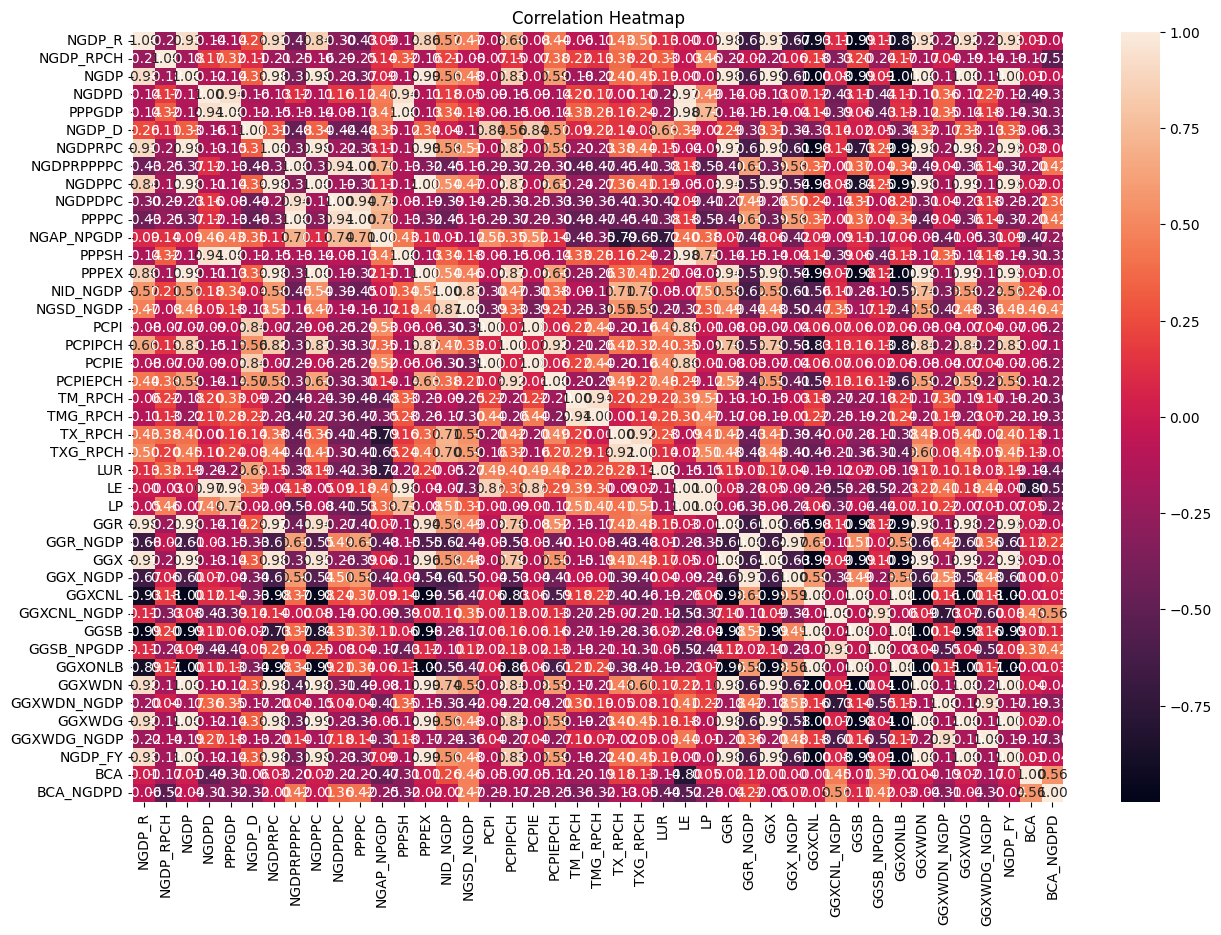

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Correlation Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(data_file.corr(), annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

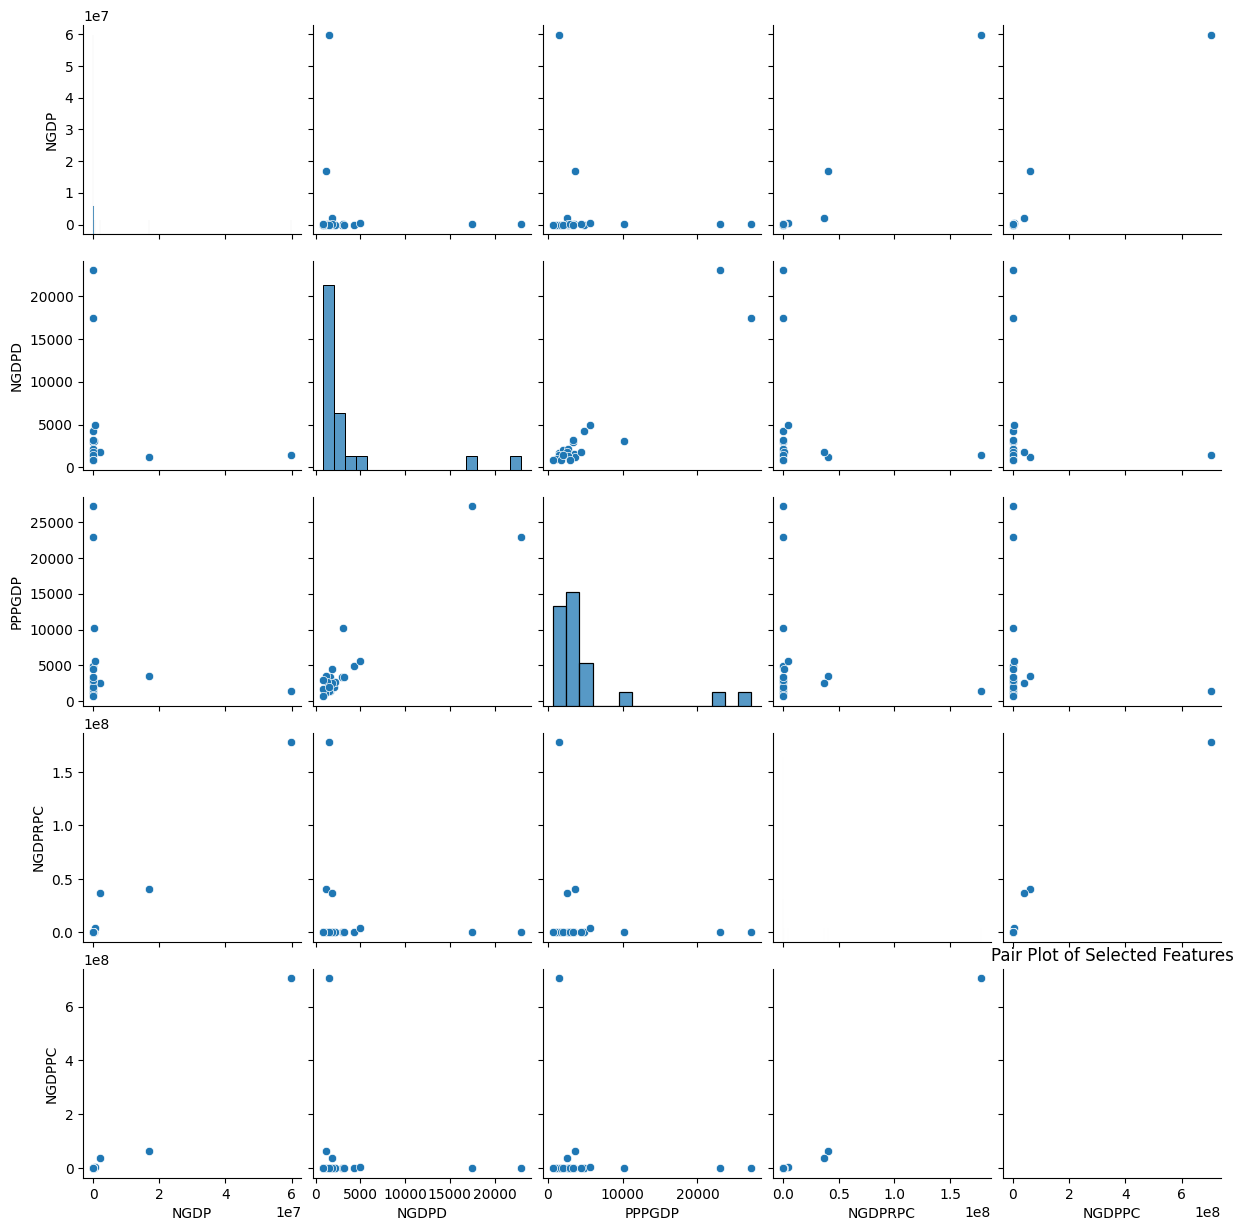

In [12]:
selected_features = ['NGDP', 'NGDPD', 'PPPGDP', 'NGDPRPC', 'NGDPPC']
sns.pairplot(data_file[selected_features])
plt.title("Pair Plot of Selected Features")
plt.show()

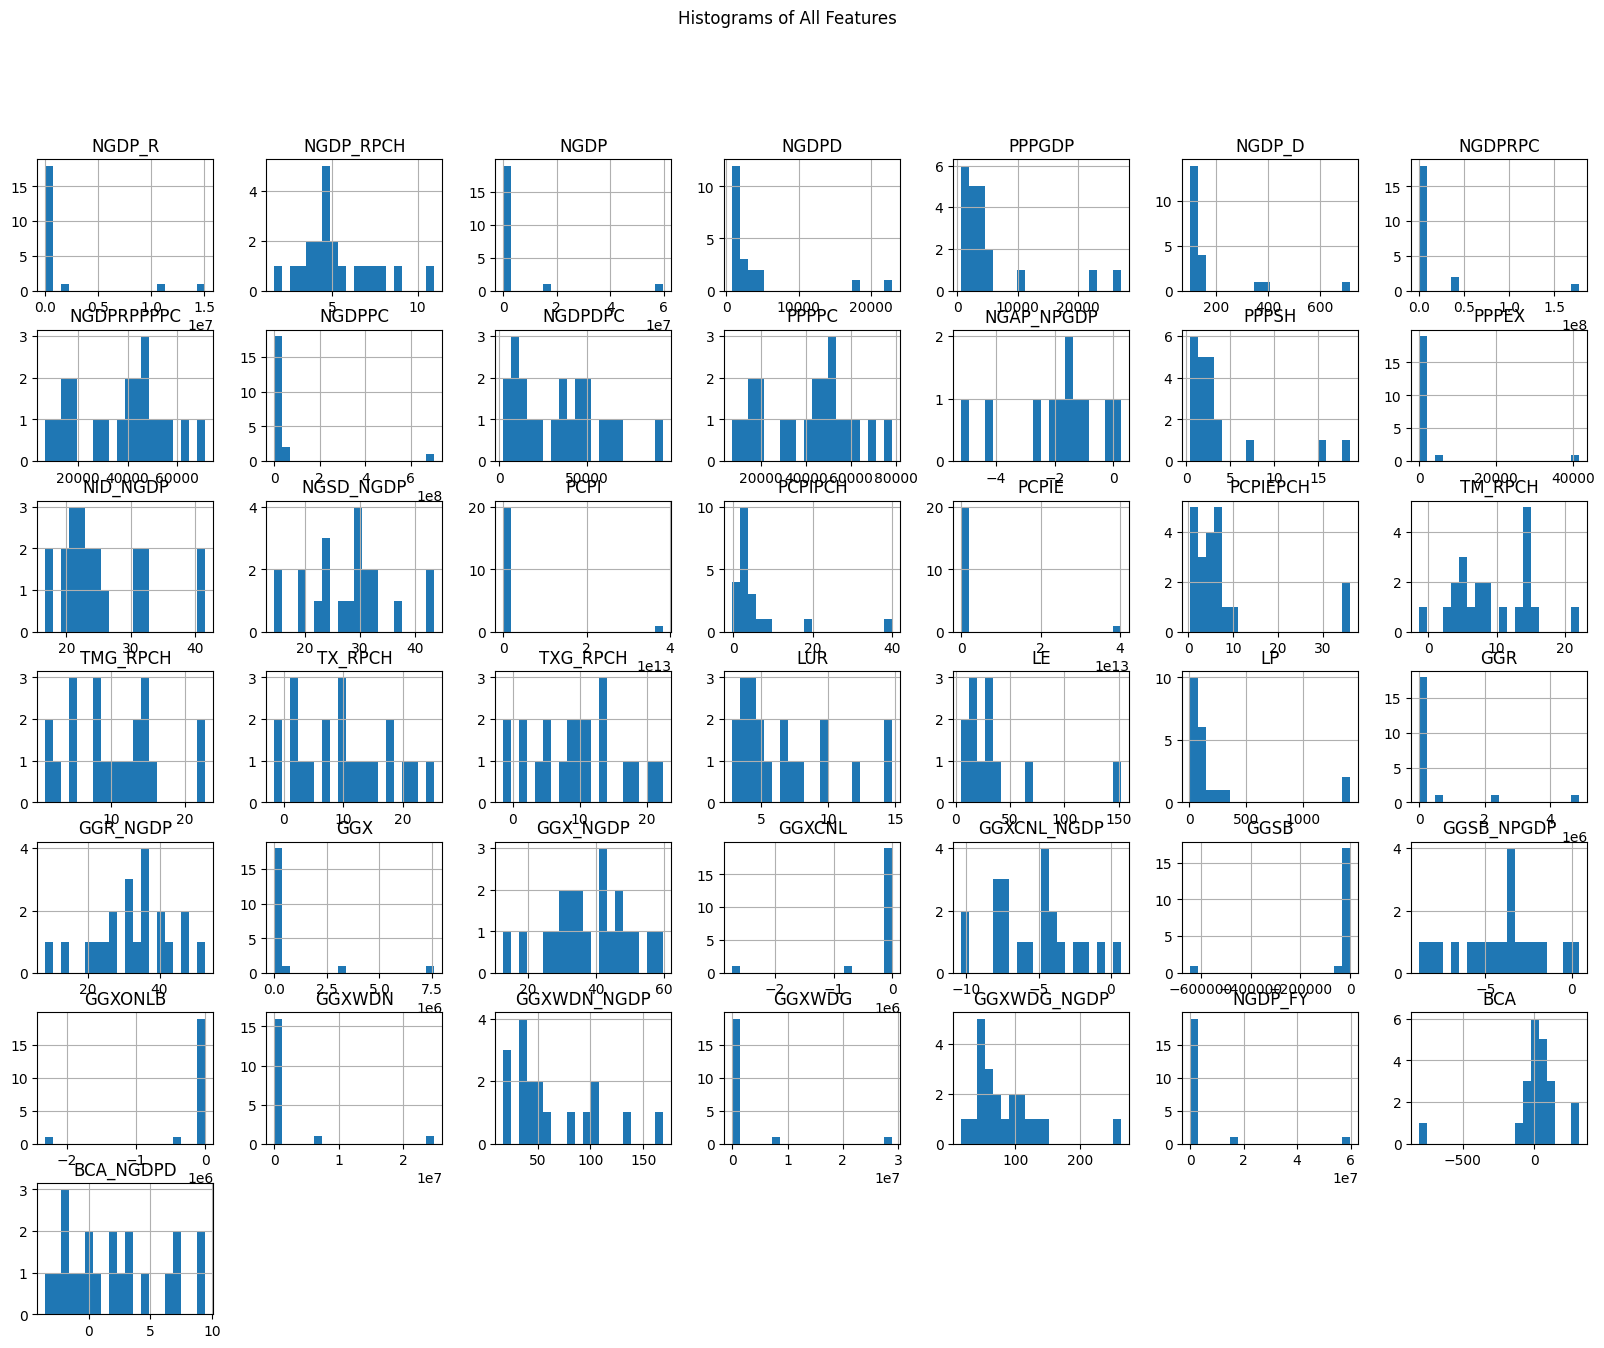

In [14]:
# 3. Histograms for all features
data_file.hist(figsize=(20, 15), bins=20)
plt.suptitle("Histograms of All Features")
plt.show()


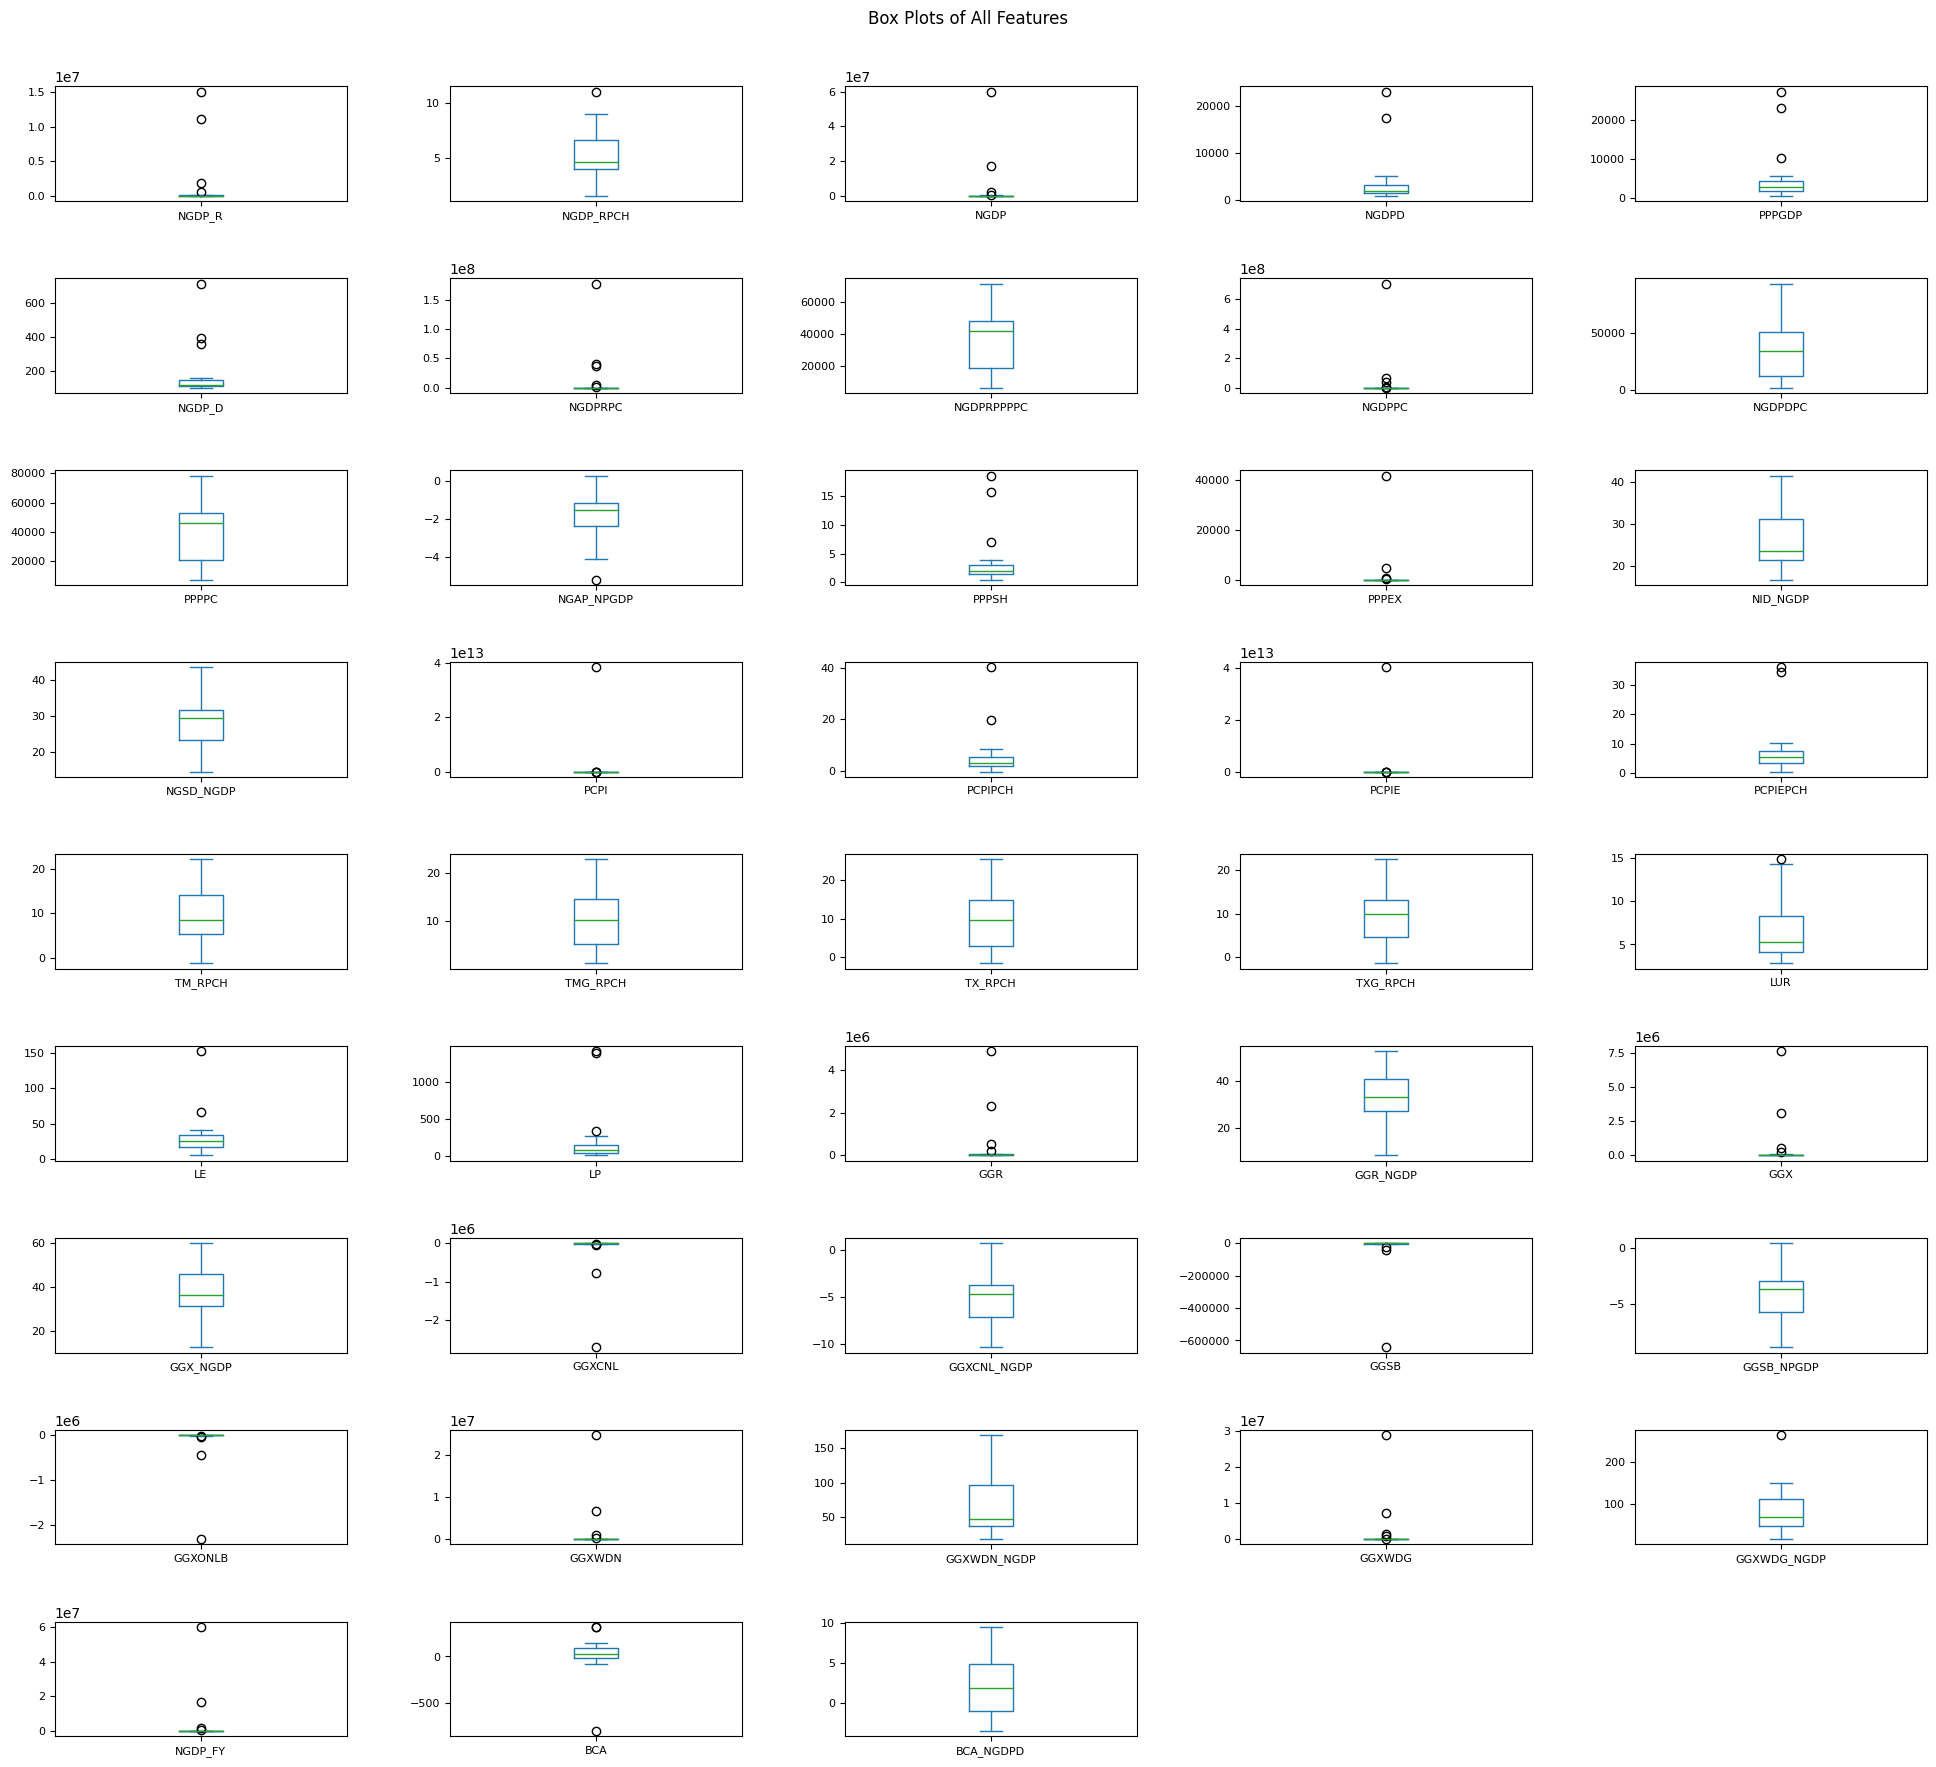

In [15]:
data_file.plot(kind='box', subplots=True, layout=(10,5), figsize=(20, 20), fontsize=8)
plt.suptitle("Box Plots of All Features")
plt.tight_layout(pad=3.0)
plt.show()

In [5]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Dropping non-numerical columns
df_processed = data_file.drop(['Country', 'GGXONLB_NGDP'], axis=1)

# Fill missing values (if any) - using mean imputation here
df_processed.fillna(df_processed.mean(), inplace=True)

# Standardizing the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(df_processed)


In [6]:
from sklearn.decomposition import PCA
import numpy as np

# Applying PCA
pca = PCA()
pca.fit(features_standardized)

# Explained variance by each principal component
explained_variance = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

# Displaying the explained variance
explained_variance, cumulative_explained_variance


(array([3.70015747e-01, 1.54047678e-01, 1.12904134e-01, 9.26259303e-02,
        6.68543396e-02, 5.29747441e-02, 3.77679785e-02, 2.49186036e-02,
        2.37930969e-02, 2.16273086e-02, 1.36338467e-02, 9.48388872e-03,
        6.99838440e-03, 4.30354809e-03, 3.12112993e-03, 2.26828353e-03,
        1.19322728e-03, 8.45487068e-04, 4.42684743e-04, 1.79958929e-04,
        1.73149090e-33]),
 array([0.37001575, 0.52406342, 0.63696756, 0.72959349, 0.79644783,
        0.84942257, 0.88719055, 0.91210916, 0.93590225, 0.95752956,
        0.97116341, 0.9806473 , 0.98764568, 0.99194923, 0.99507036,
        0.99733864, 0.99853187, 0.99937736, 0.99982004, 1.        ,
        1.        ]))

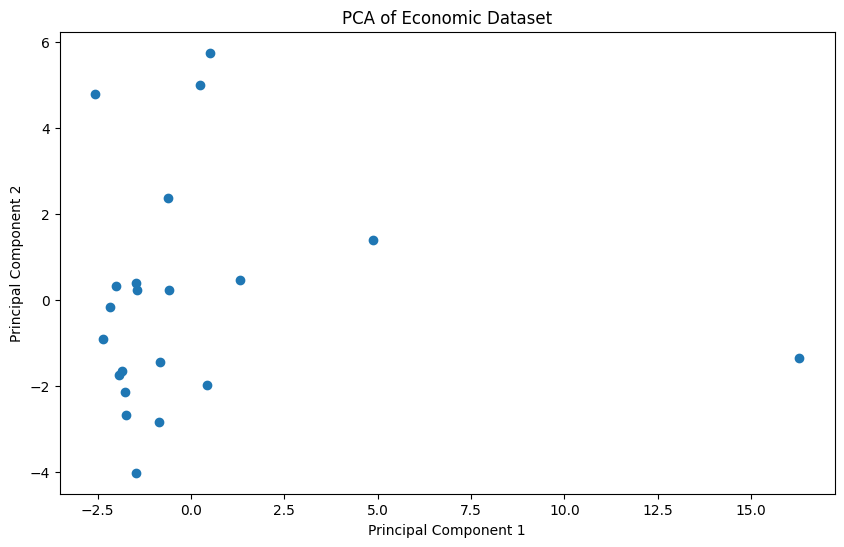

In [7]:
import matplotlib.pyplot as plt

# Choosing a number of components, for example, components that explain 95% of variance
n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1

# Applying PCA with the chosen number of components
pca_reduced = PCA(n_components=n_components)
features_pca = pca_reduced.fit_transform(features_standardized)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(features_pca[:, 0], features_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Economic Dataset')
plt.show()
import seaborn as sns
import matplotlib.pyplot as plt

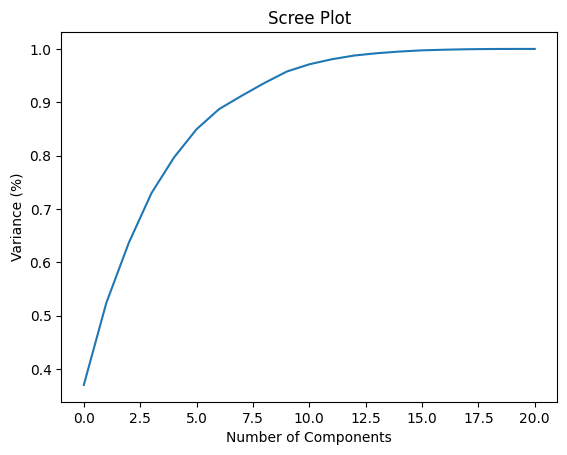

In [16]:
pca = PCA().fit(features_standardized)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') # for each component
plt.title('Scree Plot')
plt.show()


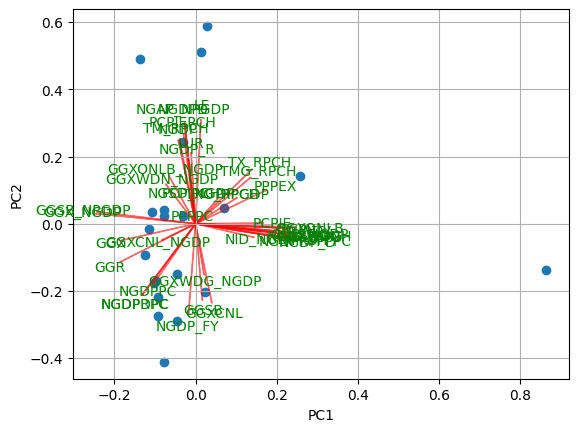

In [18]:
def biplot(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    plt.scatter(xs * scalex, ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

# Call the function. Use pca.components_ and feature names as labels
biplot(features_pca[:,0:2], np.transpose(pca.components_[0:2, :]), labels=data_file.columns)
plt.show()


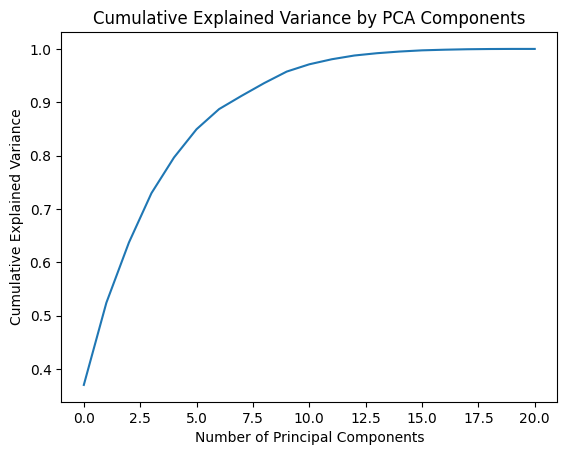

In [21]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.show()
